<a href="https://colab.research.google.com/github/sujal-prakash15/Machine_learning/blob/master/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/UCB/Ads_CTR_Optimisation.csv')
print(df)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


## Implementing UCB

In [21]:
#implementation of UCB in three steps
#after 10000 iteration try to check in what minimum no of iteration ucb was able to find out which was the best rewarding ad,eg:-5000
import math
# no_of_rounds=10000
# no_of_rounds=5000
no_of_rounds=1000
#no_of_rounds=500 //was not able to find the best ad
d=10
add_selected=[]
numbers_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0
for n in range(0,no_of_rounds):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if(numbers_of_selections[i]>0):
      avg_reward=sum_of_rewards[i]/numbers_of_selections[i]
      delta=math.sqrt(1.5*(math.log(n+1)/numbers_of_selections[i]))
      ucb=delta+avg_reward
    else:
      ucb=1e400
    if(max_upper_bound<ucb):
      max_upper_bound=ucb
      ad=i
  add_selected.append(ad)
  numbers_of_selections[ad]+=1
  sum_of_rewards[ad]+=df.values[n][ad]
  total_reward+=df.values[n][ad]

In [ ]:
    # # N = number of users we're showing an ad to
    # N = 5000
     
    # # d = number of ads we are testing
    # d = 10
     
    # # list of ads we've chosen to show to each users (length = N)
    # ads_selected = []
     
    # # list tracking the count of times each ad has been shown to users (length = d)
    # number_of_selections = [0]*d
     
    # # list tracking the count of times each ad has been clicked by a user
    # sum_of_rewards = [0]*d
     
    # # count of the total times users have clicked an ad
    # total_reward = 0 
     
    # # n is an int representing each user
    # for n in range(0,N):
    #   # ad = the number of the ad (column number)
    #   ad = 0 
    #   # max_upper_bound is the highest upper bound among our 10 ads
    #   max_upper_bound = 0 
     
    #   # i is an int representing each ad
    #   for i in range(0,d):
    #     # if the ad has been shown to a user at least once:
    #     if number_of_selections[i] >0:
    #       # average_reward is the (number of times ad is clicked) / (number of times ad is shown)
    #       average_reward = sum_of_rewards[i] / number_of_selections[i]
    #       # delta_i is the confidence interval formula we saw in the video
    #       delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
    #       # this is the upper confidence bound, our average clickrate of the ad + the confidence interval of the ad
    #       upper_bound = average_reward + delta_i
    #     else:
    #       # ad hasn't been shown yet so we set a higher upper_bound to force it to be selected
    #       upper_bound = 1e400
     
    #     # as loop through our 10 ads, we use this max_upper_bound to track which of our 10 ads has the highest upper_bound
    #     if (upper_bound>max_upper_bound):
    #       max_upper_bound = upper_bound
    #       ad=i # ad i is the ad we will show the user
      
    #   # add i to our list tracking which ads we've shown
    #   ads_selected.append(ad) 
    #   # add 1 to our count of times we've shown ad i
    #   number_of_selections[ad] += 1
    #   # look up in our dataset and check whether user n clicks ad i 
    #   # 1 means they clicked the ad, 0 means they didn't click the ad
    #   reward = dataset.values[n,ad] 
    #   # add that reward to our count of times ad i has been clicked
    #   sum_of_rewards[ad] += reward
    #   # add that reward to our count of times *ANY* ad has been clicked
    #   total_reward += reward

In [16]:
print(add_selected)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

In [17]:
print(sum_of_rewards)

[62, 33, 4, 31, 691, 1, 23, 128, 18, 5]


In [18]:
print(numbers_of_selections)

[395, 273, 135, 265, 2587, 119, 229, 650, 206, 141]


In [19]:
print(total_reward)

996


## Visualising the results

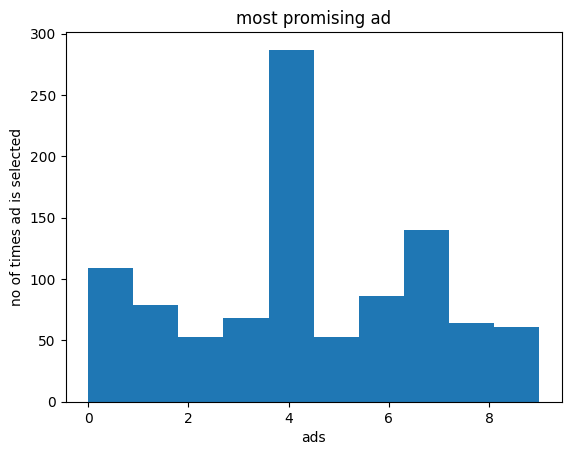

In [22]:
#plot an histogram to visualize which of the ad was choosen the most
plt.hist(add_selected)
plt.title("most promising ad")
plt.xlabel("ads")
plt.ylabel("no of times ad is selected")
plt.show()